<a href="https://colab.research.google.com/github/olaayman/GP_Tasks/blob/master/GP_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading your dataset from Kaggle directly
first we install kaggle then we connect our drive to colab

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



1. Go to your kaggle account, Scroll to API section and Click Expire API Token to remove previous tokens.

2. Click on Create New API Token - It will download kaggle.json file on your machine.

3. upload the kaggle.json to drive and copy its path.

then write the following lines and paste the path to kaggle.json instead of /content/drive/MyDrive/Kaggle-APIs/kaggle.json



In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/Kaggle-APIs/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

replace "adarshsng/heart-mri-image-dataset-left-atrial-segmentation" with the name of your dataset which you can get from the URL at kaggle when you open the dataset there 

In [ ]:
! kaggle datasets download adarshsng/heart-mri-image-dataset-left-atrial-segmentation

 99% 454M/459M [00:03<00:00, 170MB/s]
100% 459M/459M [00:03<00:00, 147MB/s]


unzip your dataset files 

In [ ]:
! unzip heart-mri-image-dataset-left-atrial-segmentation.zip

Archive:  heart-mri-image-dataset-left-atrial-segmentation.zip
  inflating: A large annotated medical image dataset for thedevelopment and evaluation of segmentationalgorithms.pdf  
  inflating: dataset.json            
  inflating: imagesTr/._la_029.nii.gz  
  inflating: imagesTr/la_003.nii     
  inflating: imagesTr/la_004.nii     
  inflating: imagesTr/la_005.nii     
  inflating: imagesTr/la_007.nii     
  inflating: imagesTr/la_009.nii     
  inflating: imagesTr/la_010.nii     
  inflating: imagesTr/la_011.nii     
  inflating: imagesTr/la_014.nii     
  inflating: imagesTr/la_016.nii     
  inflating: imagesTr/la_017.nii     
  inflating: imagesTr/la_018.nii     
  inflating: imagesTr/la_019.nii     
  inflating: imagesTr/la_020.nii     
  inflating: imagesTr/la_021.nii     
  inflating: imagesTr/la_022.nii     
  inflating: imagesTr/la_023.nii     
  inflating: imagesTr/la_024.nii     
  inflating: imagesTr/la_026.nii     
  inflating: imagesTr/la_029.nii     
  inflating: image

Copy the dataset to your drive instead of loading it everytime.
 
-> you can skip this step

In [ ]:
!cp  /content/heart-mri-image-dataset-left-atrial-segmentation.zip /content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation
!cp  -av /content/imagesTr /content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation
!cp  -av /content/imagesTs /content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation
!cp  -av /content/labelsTr /content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation

'/content/imagesTs' -> '/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTs'
'/content/imagesTs/la_001.nii' -> '/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTs/la_001.nii'
'/content/imagesTs/la_002.nii' -> '/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTs/la_002.nii'
'/content/imagesTs/la_006.nii' -> '/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTs/la_006.nii'
'/content/imagesTs/la_008.nii' -> '/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTs/la_008.nii'
'/content/imagesTs/la_012.nii' -> '/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTs/la_012.nii'
'/content/imagesTs/la_013.nii' -> '/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTs/la_013.nii'
'/content/imagesTs/la_015.nii' -> '/content/drive/MyDrive/datas

# Preprocessing on the data
first we import the needed libraries

In [21]:
#from nilearn import plotting
import pylab as plt
%matplotlib inline

import numpy as np
import nibabel as nb
import os

## Rescaling images:
### rescale the intensities of the images between 0 and 255
we loop on the images in the folder and rescale each one then save it to a new folder called rescaled_images

In [ ]:
imagesDirectory = '/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTr/'
 
for image in os.listdir(imagesDirectory):
    imgDir = os.path.join(imagesDirectory, image)
    img = nb.load(imgDir)
    data = img.get_data()
    rescaled = ((data - data.min()) * 255. / (data.max() - data.min())).astype(np.uint8)
    rescalesImg = nb.Nifti1Image(rescaled, affine=img.affine, header=img.header)
    nb.save(rescalesImg, '/content/rescaled_images/'+image)
    

## Slice 3D images
slice the images in the z direction and save each slice ans its label as a seperate file

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.


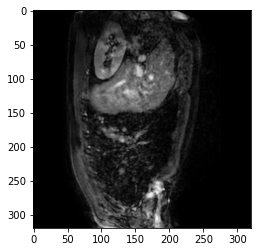

In [49]:
img_3D = nb.load('/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTr/la_003.nii')
label_3D = nb.load('/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/labelsTr/la_003.nii')
img_data= img_3D.get_data()
label_data = label_3D.get_data()
if(img_data.shape[2]==label_data.shape[2]):
  for z in range(img_data.shape[2]):
    plt.imshow(img_data[:,:,z].T, cmap='Greys_r')
    newSlice = nb.Nifti1Image(img_data[:,:,z], affine=img_3D.affine, header=img_3D.header)
    nb.save(newSlice , '/content/sliced_images/images/la_003_'+str(z)+'.nii.gz')
    newSliceLabel = nb.Nifti1Image(label_data[:,:,z], affine=label_3D.affine, header=label_3D.header)
    nb.save(newSliceLabel , '/content/sliced_images/labels/la_003_'+str(z)+'.nii.gz')




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


(320, 320, 130)
maximun is 0.0


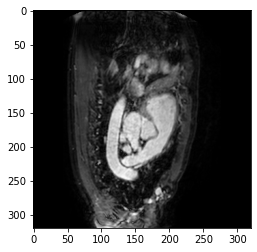

In [48]:
t1 = nb.load('/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTr/la_003.nii')
data = t1.get_data()
rescalesImg = nb.Nifti1Image(data[:,:,50], affine=t1.affine, header=t1.header)
nb.save(rescalesImg , '/content/sliced_images/images/ola1.nii.gz')
plt.imshow(data[:, :, data.shape[2] // 2].T, cmap='Greys_r')
print(data.shape)
print("maximun is", np.min(data[:,:,:]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if __name__ == '__main__':


(320, 320, 130)
(dtype('<f4'), dtype('<f4'))
maximun is 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if sys.path[0] == '':


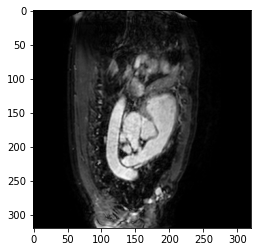

In [18]:
# Now we force the values to be between 0 and 255
# and change the datatype to unsigned 8-bit
rescaled = ((data - data.min()) * 255. / (data.max() - data.min())).astype(np.uint8)
# Now we can save the changed data into a new NIfTI file
new_img = nb.Nifti1Image(rescaled, affine=t1.affine, header=t1.header)
nb.save(new_img, '/content/rescaled_image.nii.gz')

new_img = nb.load('/content/rescaled_image.nii.gz')
data2 = new_img.get_data()
plt.imshow(data2[:, :, data2.shape[2] // 2].T, cmap='Greys_r')
print(data2.shape)
print((new_img.get_data().dtype, new_img.get_data_dtype()))
print("maximun is", np.min(data2[:,:,:]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


(320, 320, 120)


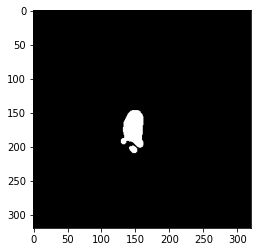

In [6]:
t2 = nb.load('/content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/labelsTr/la_005.nii')
data = t2.get_data()
plt.imshow(data[:, :, data.shape[2] // 2].T, cmap='Greys_r')
print(data.shape)

Affine:
[[1.25 0.   0.   0.  ]
 [0.   1.25 0.   0.  ]
 [0.   0.   1.37 0.  ]
 [0.   0.   0.   1.  ]]
Center: (0, 0, 0)


<OrthoSlicer3D: /content/drive/MyDrive/datasets/heart-mri-image-dataset-left-atrial-segmentation/imagesTr/la_003.nii (320, 320, 130)>

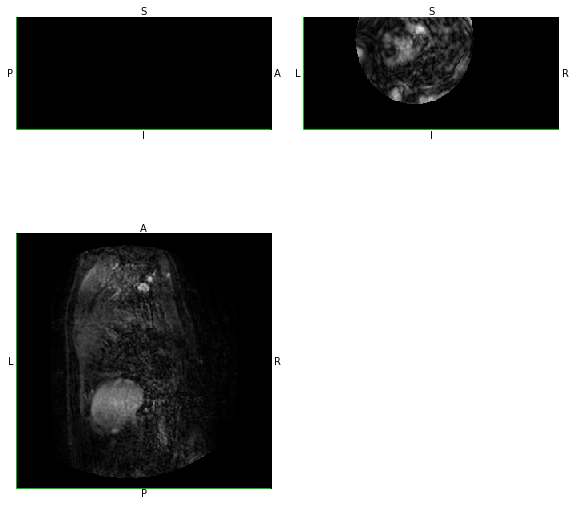

In [9]:
affine = t1.affine
x, y, z, _ = np.linalg.pinv(affine).dot(np.array([0, 0, 0, 1])).astype(int)

print("Affine:")
print(affine)
print
print("Center: ({:d}, {:d}, {:d})".format(x, y, z))
nb.aff2axcodes(affine)
nb.affines.voxel_sizes(affine)
nb.aff2axcodes(affine)
nb.affines.voxel_sizes(affine)
t1.orthoview()

<IPython.core.display.Javascript object>

<OrthoSlicer3D: /content/imagesTr/la_005.nii (320, 320, 120)>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
TypeError: _cleanup() takes 1 positional argument but 2 were given
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
TypeError: _cleanup() takes 1 positional argument but 2 were given
